# **1. Perkenalan Dataset**

Dataset yang digunakan merupakan dataset publik tentang prediksi kategori obesitas dari kaggle yang memiliki 1000 baris dan 7 kolom.
- Age: Usia, yang dinyatakan dalam tahun.
- Gender: Jenis kelamin individu, dikategorikan sebagai male atau female.
- Height: Tinggi individu, diukur dalam centimeter atau inches.
- Weight: Berat badan individu, diukur dalam kilograms atau pounds.
- BMI: Metrik yang berasal dari berat dan tinggi individu
- PhysicalActivityLevel: Variabel ini mengukur tingkat aktivitas fisik individu
- ObesityCategory: Penggolongan individu berdasarkan BMI ke dalam kategori obesitas yang berbeda

Dataset: https://www.kaggle.com/datasets/mrsimple07/obesity-prediction

# **2. Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # Encoder
from sklearn.preprocessing import StandardScaler # Standarisasi

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('../obesity_data_raw.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


- Terdapat 1000 baris dalam dataset
- Terdapat 7 kolom yaitu: Age, Gender, Height, Weight, BMI, PhysicalActivityLevel, ObesityCategory

# **4. Exploratory Data Analysis (EDA)**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


- Terdapat 2 kolom dengan tipe int64, yaitu Age dan PhysicalActivityLevel.
- Terdapat 3 kolom dengan tipe float64, yaitu Height, Weight, dan BMI.
- Terdapat 2 kolom dengan tipe object, yaitu Gender dan ObesityCategory.
- Kolom ObesityCategory yang akan dijadikan target klasifikasi.

In [4]:
df.describe(include='all')

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,2,NaN,NaN,NaN,NaN,4
top,NaN,Male,NaN,NaN,NaN,NaN,Normal weight
freq,NaN,523,NaN,NaN,NaN,NaN,371
mean,49.857000,NaN,170.052417,71.205769,24.888317,2.534000,NaN
std,18.114267,NaN,10.309971,15.509849,6.193912,1.116284,NaN
min,18.000000,NaN,136.115719,26.065730,8.470572,1.000000,NaN
25%,35.000000,NaN,163.514205,61.129629,20.918068,2.000000,NaN
50%,50.000000,NaN,169.801665,71.929072,24.698647,3.000000,NaN
75%,66.000000,NaN,177.353596,81.133746,28.732132,4.000000,NaN


- Rentang umur pada dataset ini adalah 18 sampai 79 tahun, dengan rata-rata 50 tahun
- Rentang nilai Height pada dataset ini adalah 136 sampai 201, dengan rata-rata 170
- Rentang nilai Weight pada dataset ini adalah 26 sampai 118, dengan rata-rata 71
- Rentang nilai BMI pada dataset ini adalah 8.4 sampai 50.79, dengan rata-rata 24.88
- PhysicalActivityLevel memiliki rentang nilai 1 sampai 4
- ObesityCategory mempunyai 4 kategori

## Mengecek Missing Value

In [5]:
df.isna().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

Tidak ada data missing value

## Mengecek Data Duplicated

In [6]:
print(df.duplicated().sum())

0


Tidak ada data duplicated

## Mengecek data outlier

In [7]:
num_features = df.select_dtypes(include=[np.number]).columns

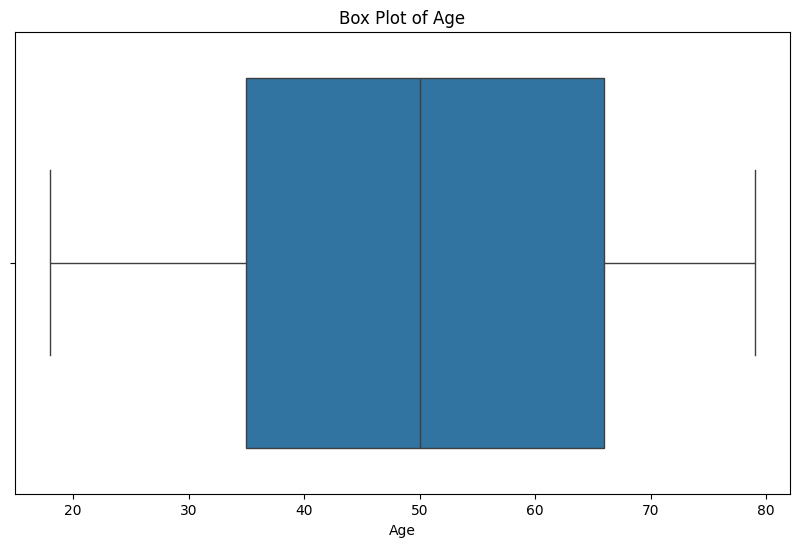

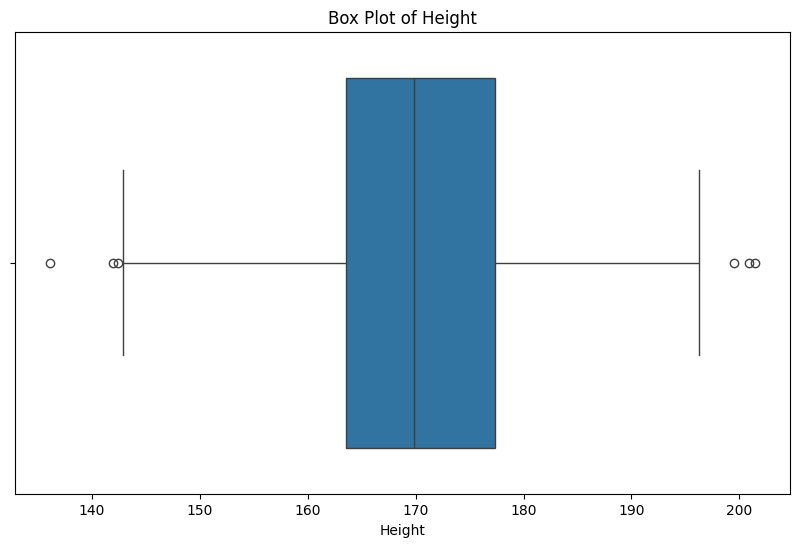

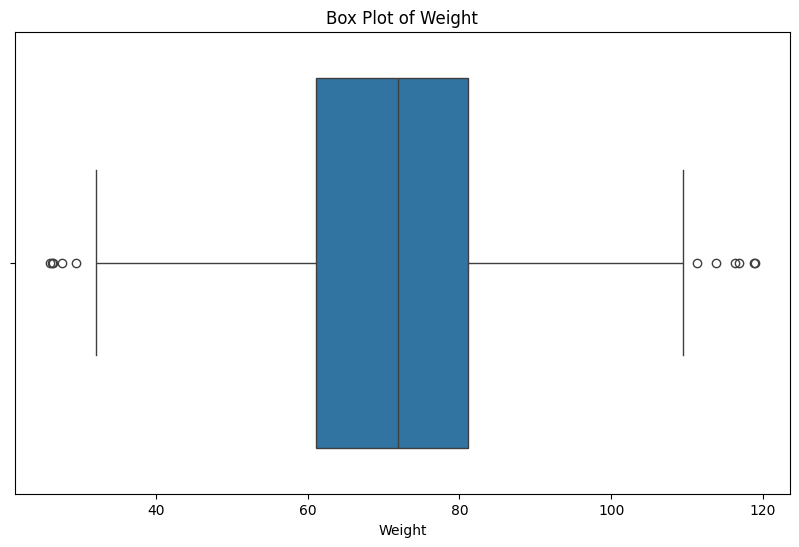

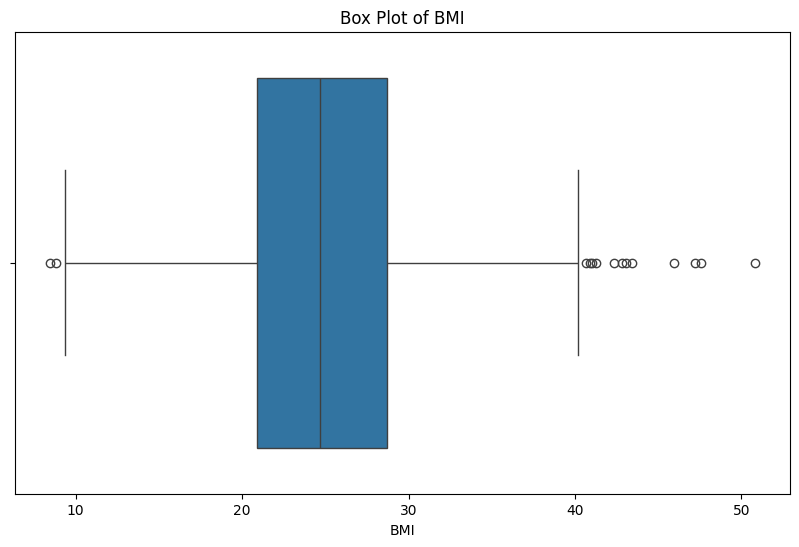

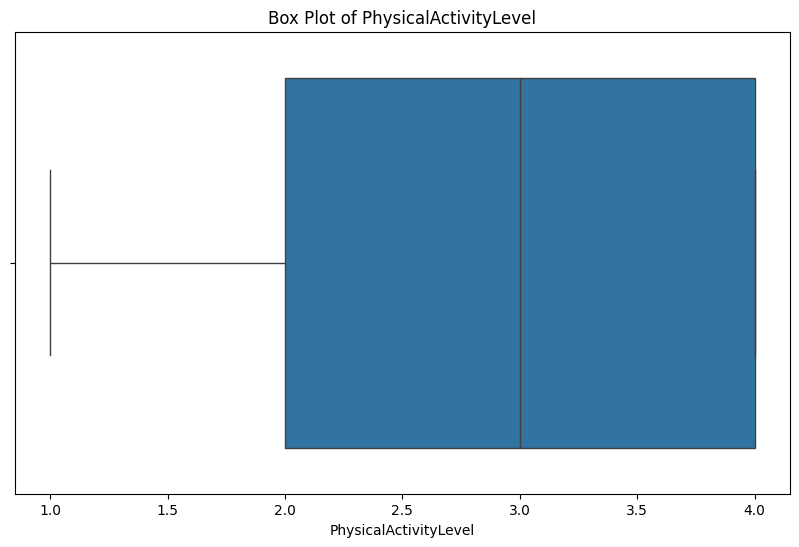

In [8]:
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

Terdapat 3 kategori yang mempunyai data outlier yaitu BMI, height, dan weight

## Univariate Analysis

### Categoric Features

In [9]:
cat_features = df.select_dtypes(include=['object']).columns

        jumlah sampel  persentase
Gender                           
Male              523        52.3
Female            477        47.7


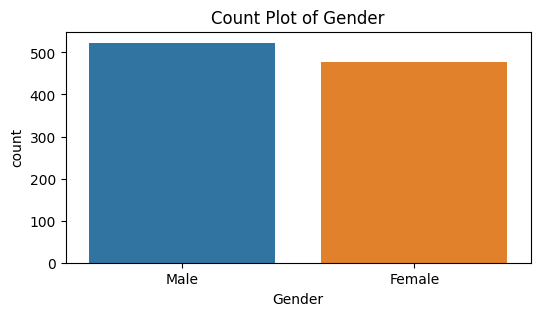

                 jumlah sampel  persentase
ObesityCategory                           
Normal weight              371        37.1
Overweight                 295        29.5
Obese                      191        19.1
Underweight                143        14.3


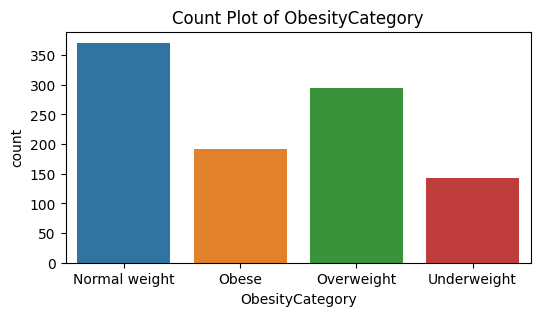

In [10]:
for feature in cat_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=df[feature], hue=df[feature])
    plt.title(f'Count Plot of {feature}')
    percent = 100*df[feature].value_counts(normalize=True)
    count = df[feature].value_counts()
    df_gender = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
    print(df_gender)
    plt.show()

Dari visualisasi tersebut didapatkan:
- Kolom gender memiliki 2 kategori yaitu male dan female, jumlah data male lebih banyak dari female.
- Kolom ObesityCategory memilih 4 kategori yaitu Normal Weight, Obese, Overweight, dan Underweight. Untuk jumlah paling banyak adalah normal weight dan paling sedikit adalah underweight.

### Numeric Features

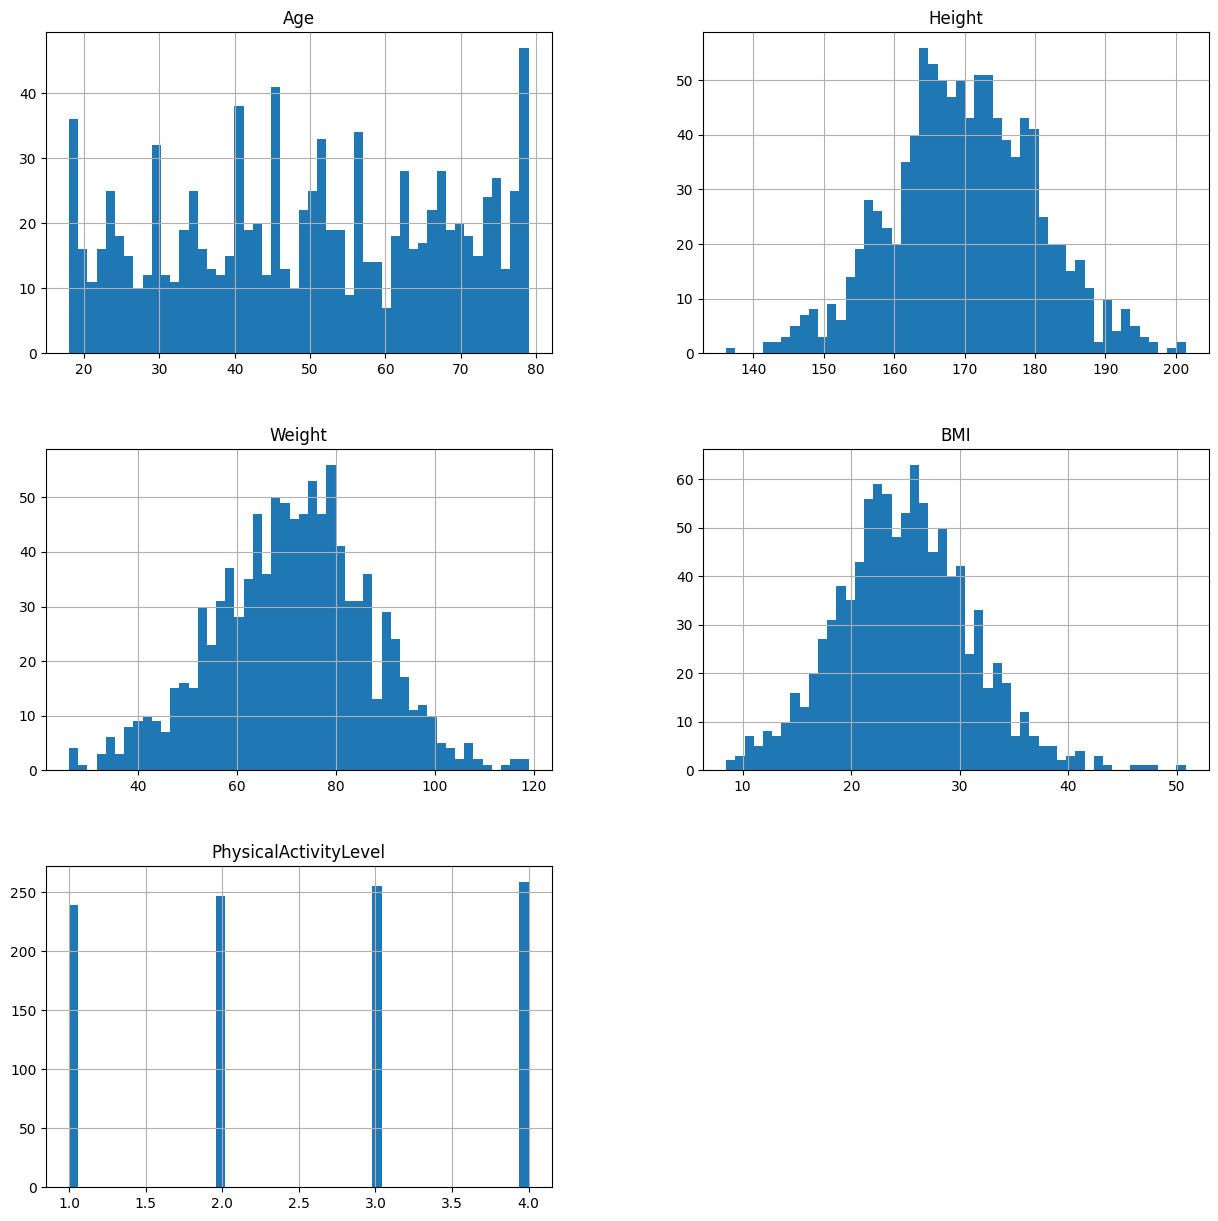

In [11]:
df.hist(bins=50, figsize=(15,15))
plt.show()

Dari Histogram numeric feature tersebut dapat informasi bahwa:
- Age
    - Distribusinya tidak merata; terlihat banyak puncak (multimodal), yang mengindikasikan kelompok usia tertentu lebih banyak dibanding yang lain.
    - Usia berkisar dari sekitar 15 hingga 80 tahun.
- Height
    - Distribusi tinggi badan menyerupai distribusi normal (berbentuk lonceng).
    - Distribusi berada sekitar 165–175 cm.
- Weight
    - Distribusinya juga mendekati distribusi normal, dengan berat badan umumnya berkisar dari 50–90 kg.
    - Titik puncak terlihat di kisaran 70–80 kg.
- BMI
    - BMI juga menunjukkan distribusi menyerupai normal, dengan mayoritas nilai BMI berada di antara 20 dan 30.
- PhysicalActivityLevel (Tingkat Aktivitas Fisik)
    - Ini adalah data kategorikal diskret dengan empat level (kemungkinan 1–4).
    - Setiap level memiliki jumlah yang hampir sama, mengindikasikan distribusi yang seimbang.

## Multivariate Analysis

### Categoric Features

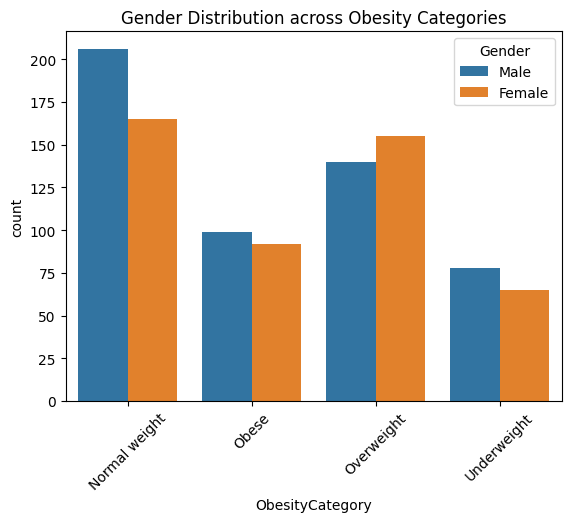

In [12]:
sns.countplot(x='ObesityCategory', hue='Gender', data=df)
plt.title('Gender Distribution across Obesity Categories')
plt.xticks(rotation=45)
plt.show()

- Laki-laki cenderung mendominasi kelompok dengan berat badan normal.
- Perempuan lebih banyak di kelompok overweight, yang bisa menjadi indikator penting jika dikaitkan dengan faktor lain seperti usia atau tingkat aktivitas fisik.
- Tidak ada perbedaan ekstrem antara gender di kategori obesitas, menunjukkan distribusi yang relatif merata.

### Numeric Features

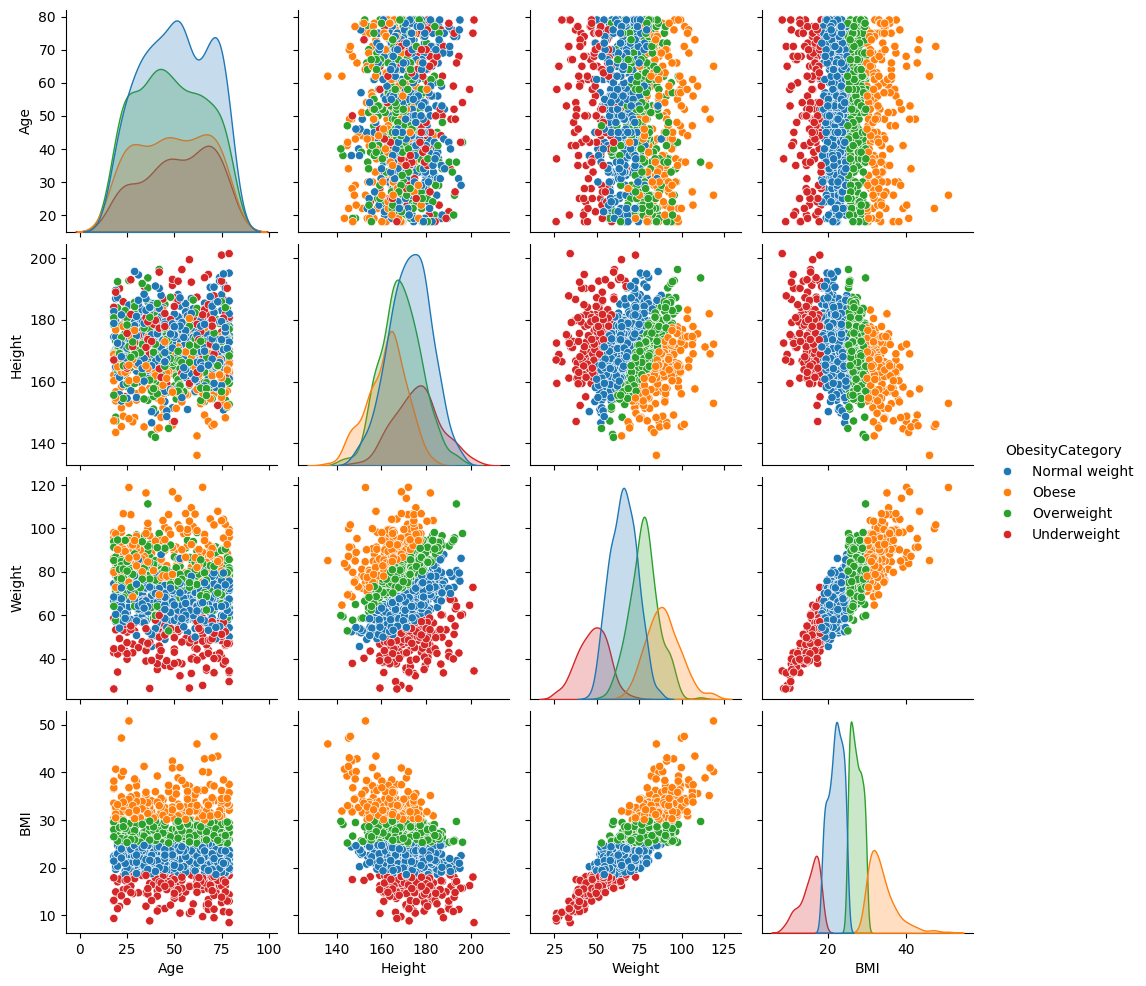

In [13]:
sns.pairplot(df, hue='ObesityCategory', vars=['Age', 'Height', 'Weight', 'BMI'])
plt.show()

Diagram diatas merupakan data persebaran feature numeric berdasarkan ObesityCategory, terlihat ada data saling tumpang tindih dan yang tidak tumpang tindih.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

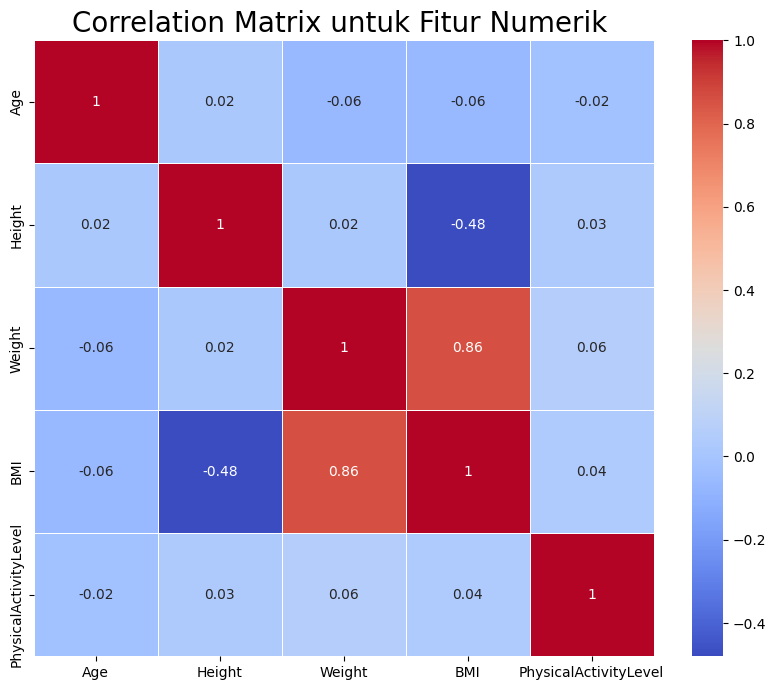

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Diatas merupakan correlation matrix dari feature numeric, koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.  

# **5. Data Preprocessing**

In [15]:
df_clean = df.copy()

## Penanganan Data Outlier menggunakan teknik IQR

In [16]:
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df_clean[num_features].quantile(0.25)
Q3 = df_clean[num_features].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df_clean[num_features] < (Q1 - 1.5 * IQR)) |
                    (df_clean[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df_clean = df_clean[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df_clean.shape

(974, 7)

Untuk data outlier akan di hapus dengan metode IQR yaitu menggunakan quartil, jika nilai dibawah Q1 dan lebih dari Q3 akan dihapus.


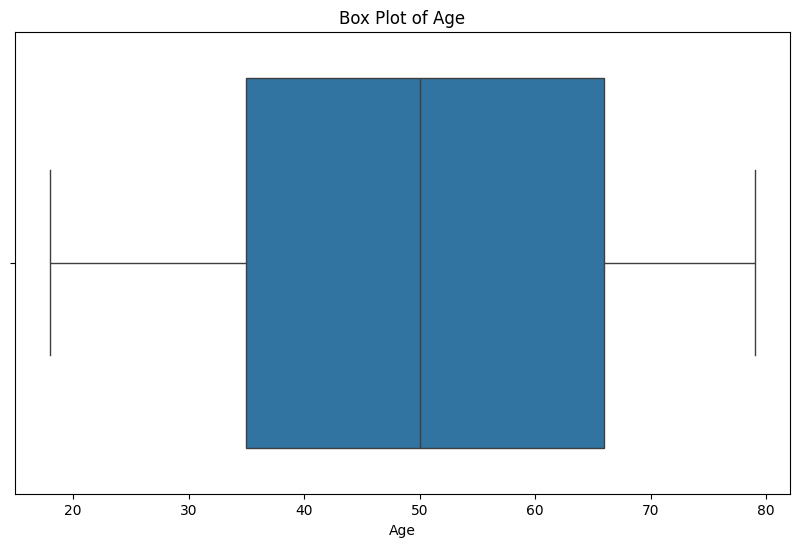

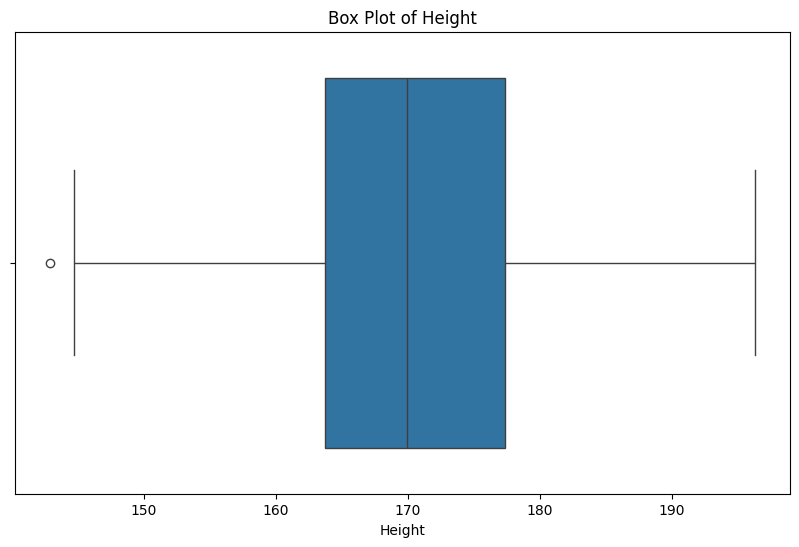

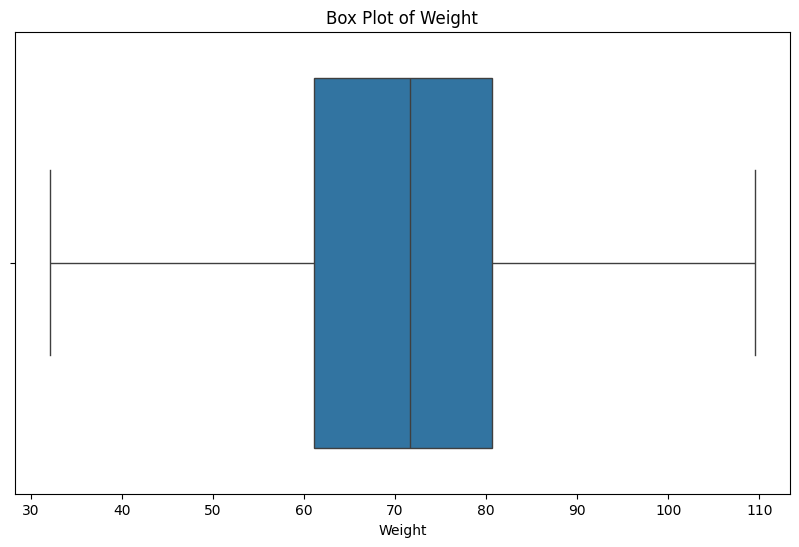

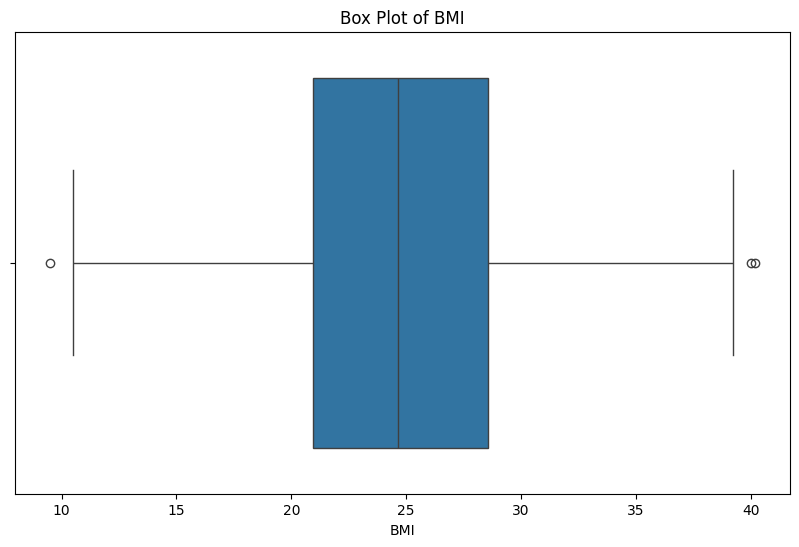

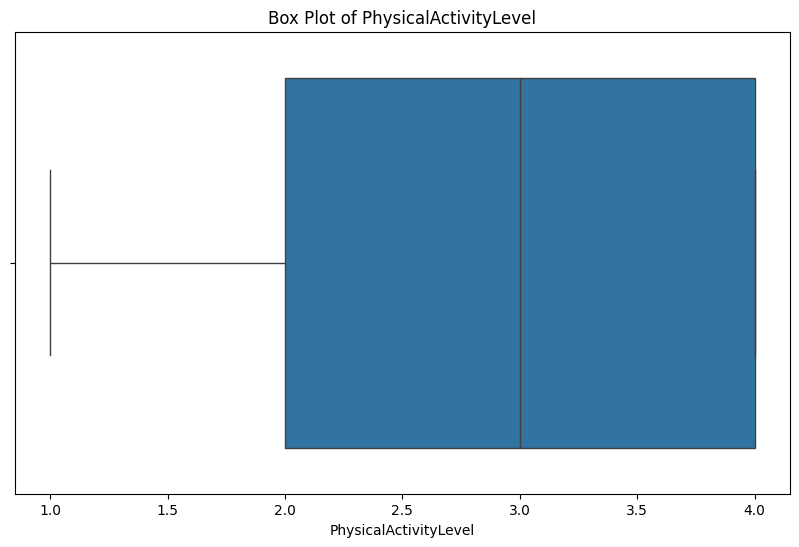

In [17]:
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_clean[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


## Standarisasi

In [18]:
# Standarisasi
num_features = df_clean.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
df_clean[num_features] = scaler.fit_transform(df_clean[num_features])
df_clean.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,0.342834,Male,0.336934,0.068097,-0.142867,1.307836,Normal weight
1,1.061536,Male,-0.619269,1.289454,1.523722,-0.477493,Obese
2,-0.210014,Female,-0.220017,0.132543,0.194883,1.307836,Overweight
3,-0.984001,Male,-0.180806,0.944843,0.912925,0.415171,Overweight
4,0.563973,Male,1.348331,-0.131855,-0.739795,0.415171,Normal weight


Standarisasi menghasilkan distribusi angka rentang 1 sampai -1, hal ini dilakukan agar algoritma tidak terpengaruh oleh perbedaan skala antar fitur.

## Encoding category feature

In [19]:
label_encoder = LabelEncoder()

# Encode kolom kategorikal
for column in cat_features:
    df_clean[column] = label_encoder.fit_transform(df_clean[column])

df_clean.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,0.342834,1,0.336934,0.068097,-0.142867,1.307836,0
1,1.061536,1,-0.619269,1.289454,1.523722,-0.477493,1
2,-0.210014,0,-0.220017,0.132543,0.194883,1.307836,2
3,-0.984001,1,-0.180806,0.944843,0.912925,0.415171,2
4,0.563973,1,1.348331,-0.131855,-0.739795,0.415171,0


Encoding fitur kategori menggunakan LabelEncoder, hal ini dilakukan sebab model klasifikasi membutuhkan input numerik, maka dari itu fitur kategori yang bertipe object di rubah menjadi numerik agar model mengenali data kategorikal

# Saved dataset clean

In [26]:
# Simpan CSV ke folder tersebut
df_clean.to_csv('obesity_data_preprocessing.csv', index=False)

test